In [13]:
import pandas as pd

# Read the CSV file
sales = pd.read_csv('pos sales.csv')

# Display the first few rows of the dataframe
sales.head()

,txn_id,store_num,business_date,item_desc,sale_amt
0,359344,6752,9/4/2024,16 OZ COFFEE,1.99
1,1291468,926,9/4/2024,16 OZ COFFEE,3.58
2,991090,885,9/4/2024,16 OZ COFFEE,1.79
3,1359224,6943,9/4/2024,16 OZ COFFEE,1.89
4,565176,6747,9/4/2024,16 OZ COFFEE,1.79


In [14]:
# Remove the unwanted columns from the sales dataframe
columns_to_keep = ['txn_id', 'store_num', 'business_date', 'item_desc', 'sale_amt']
sales = sales[columns_to_keep]

# Display the first few rows of the updated dataframe
sales.head()

,txn_id,store_num,business_date,item_desc,sale_amt
0,359344,6752,9/4/2024,16 OZ COFFEE,1.99
1,1291468,926,9/4/2024,16 OZ COFFEE,3.58
2,991090,885,9/4/2024,16 OZ COFFEE,1.79
3,1359224,6943,9/4/2024,16 OZ COFFEE,1.89
4,565176,6747,9/4/2024,16 OZ COFFEE,1.79


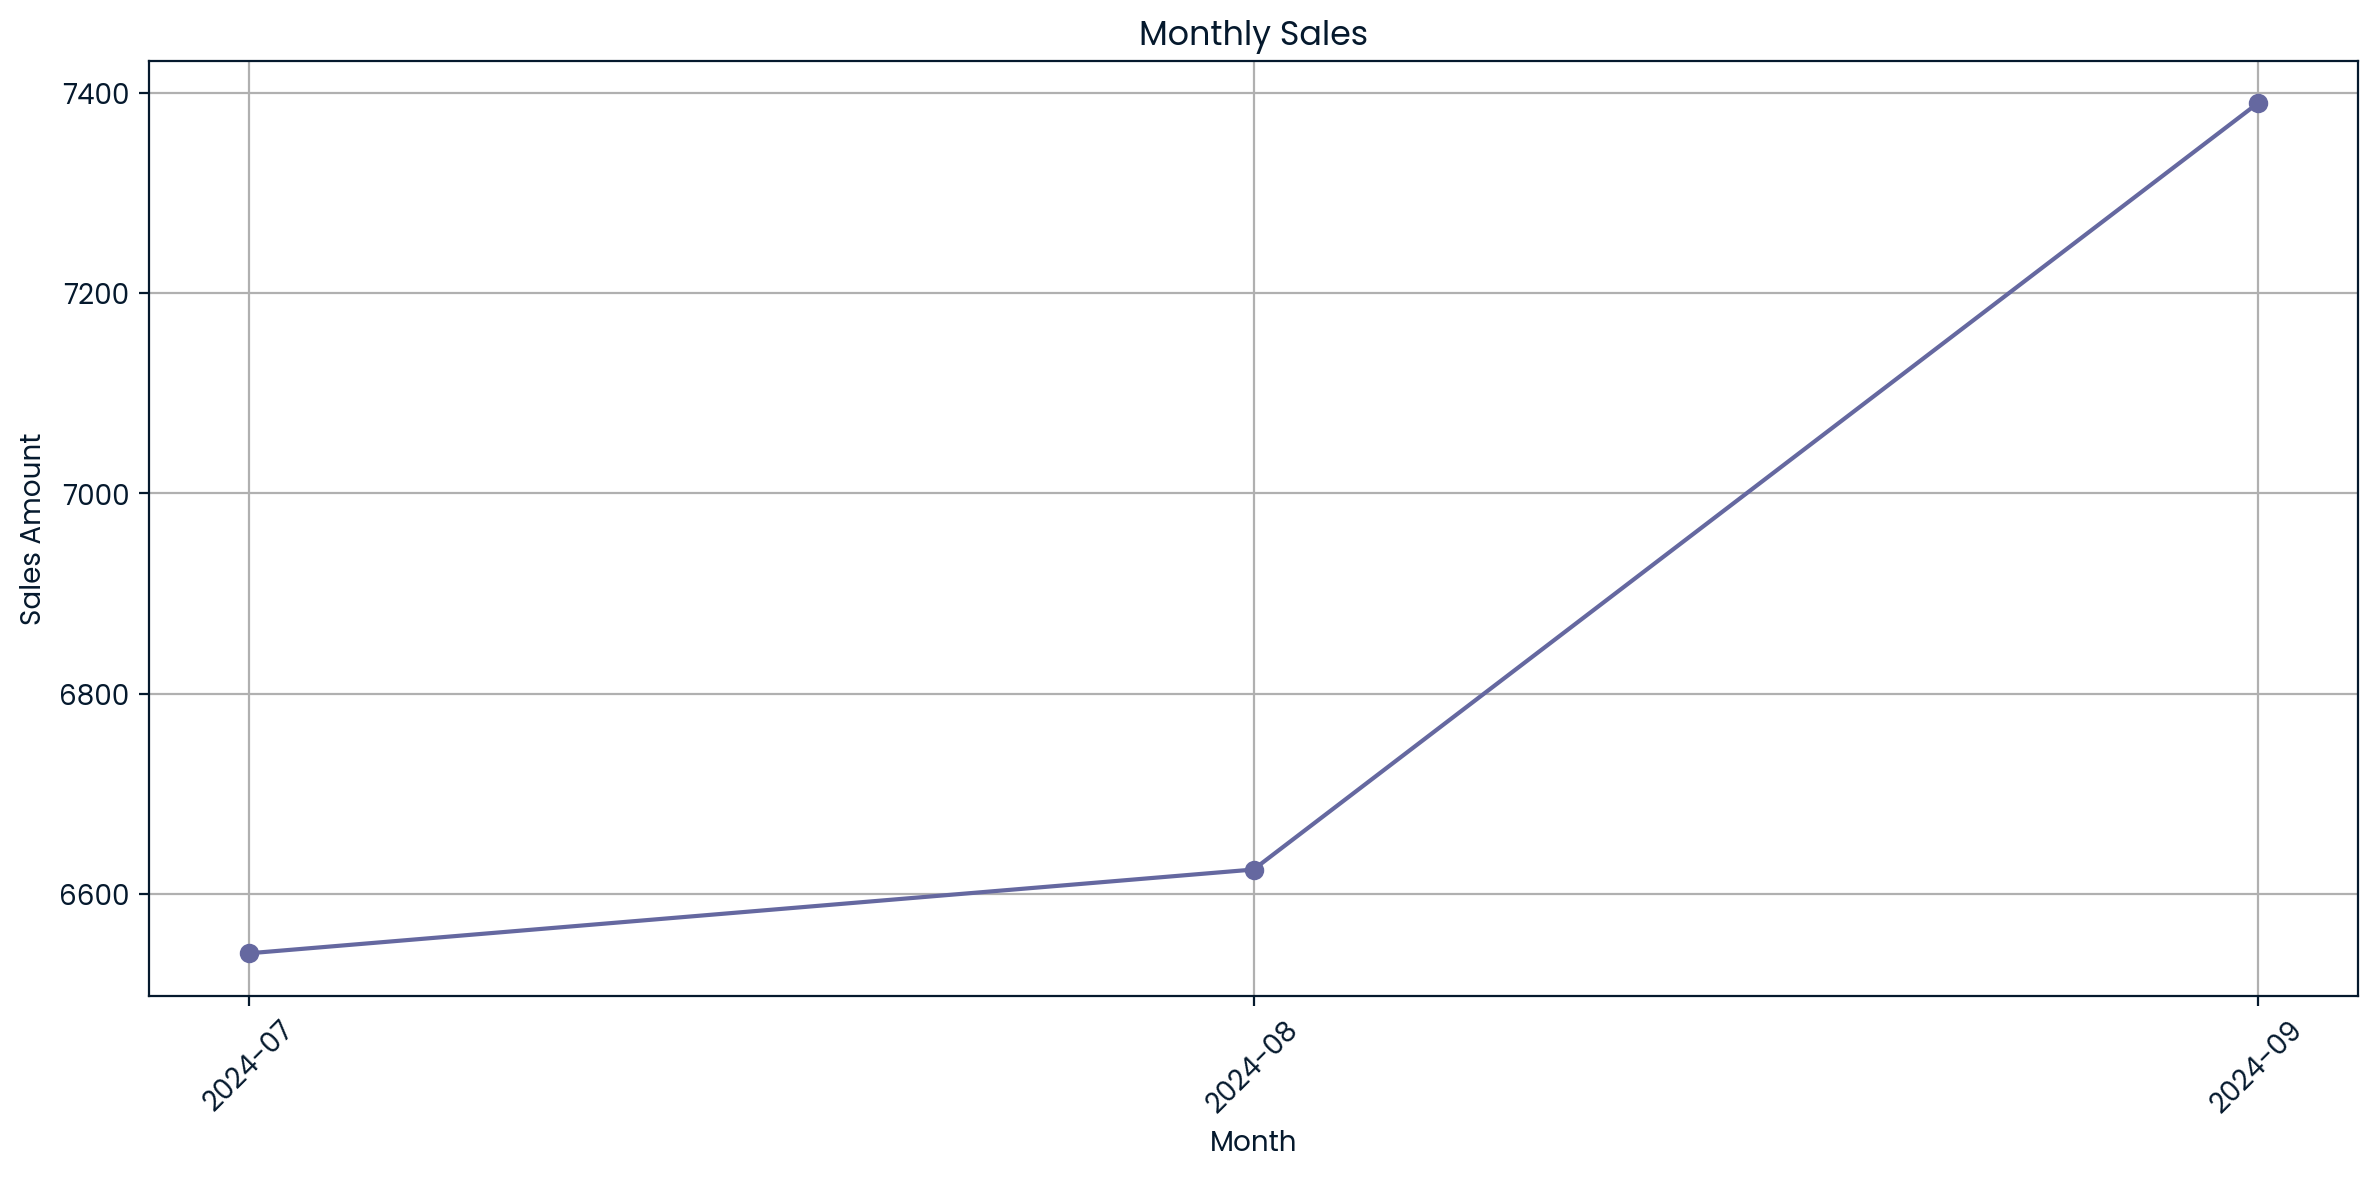

In [15]:
import matplotlib.pyplot as plt

# Convert 'business_date' to datetime format
sales['business_date'] = pd.to_datetime(sales['business_date'])

# Extract year and month from 'business_date'
sales['year_month'] = sales['business_date'].dt.to_period('M')

# Group by year and month and sum the sales amount
monthly_sales = sales.groupby('year_month')['sale_amt'].sum().reset_index()

# Plot the monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'].astype(str), monthly_sales['sale_amt'], marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



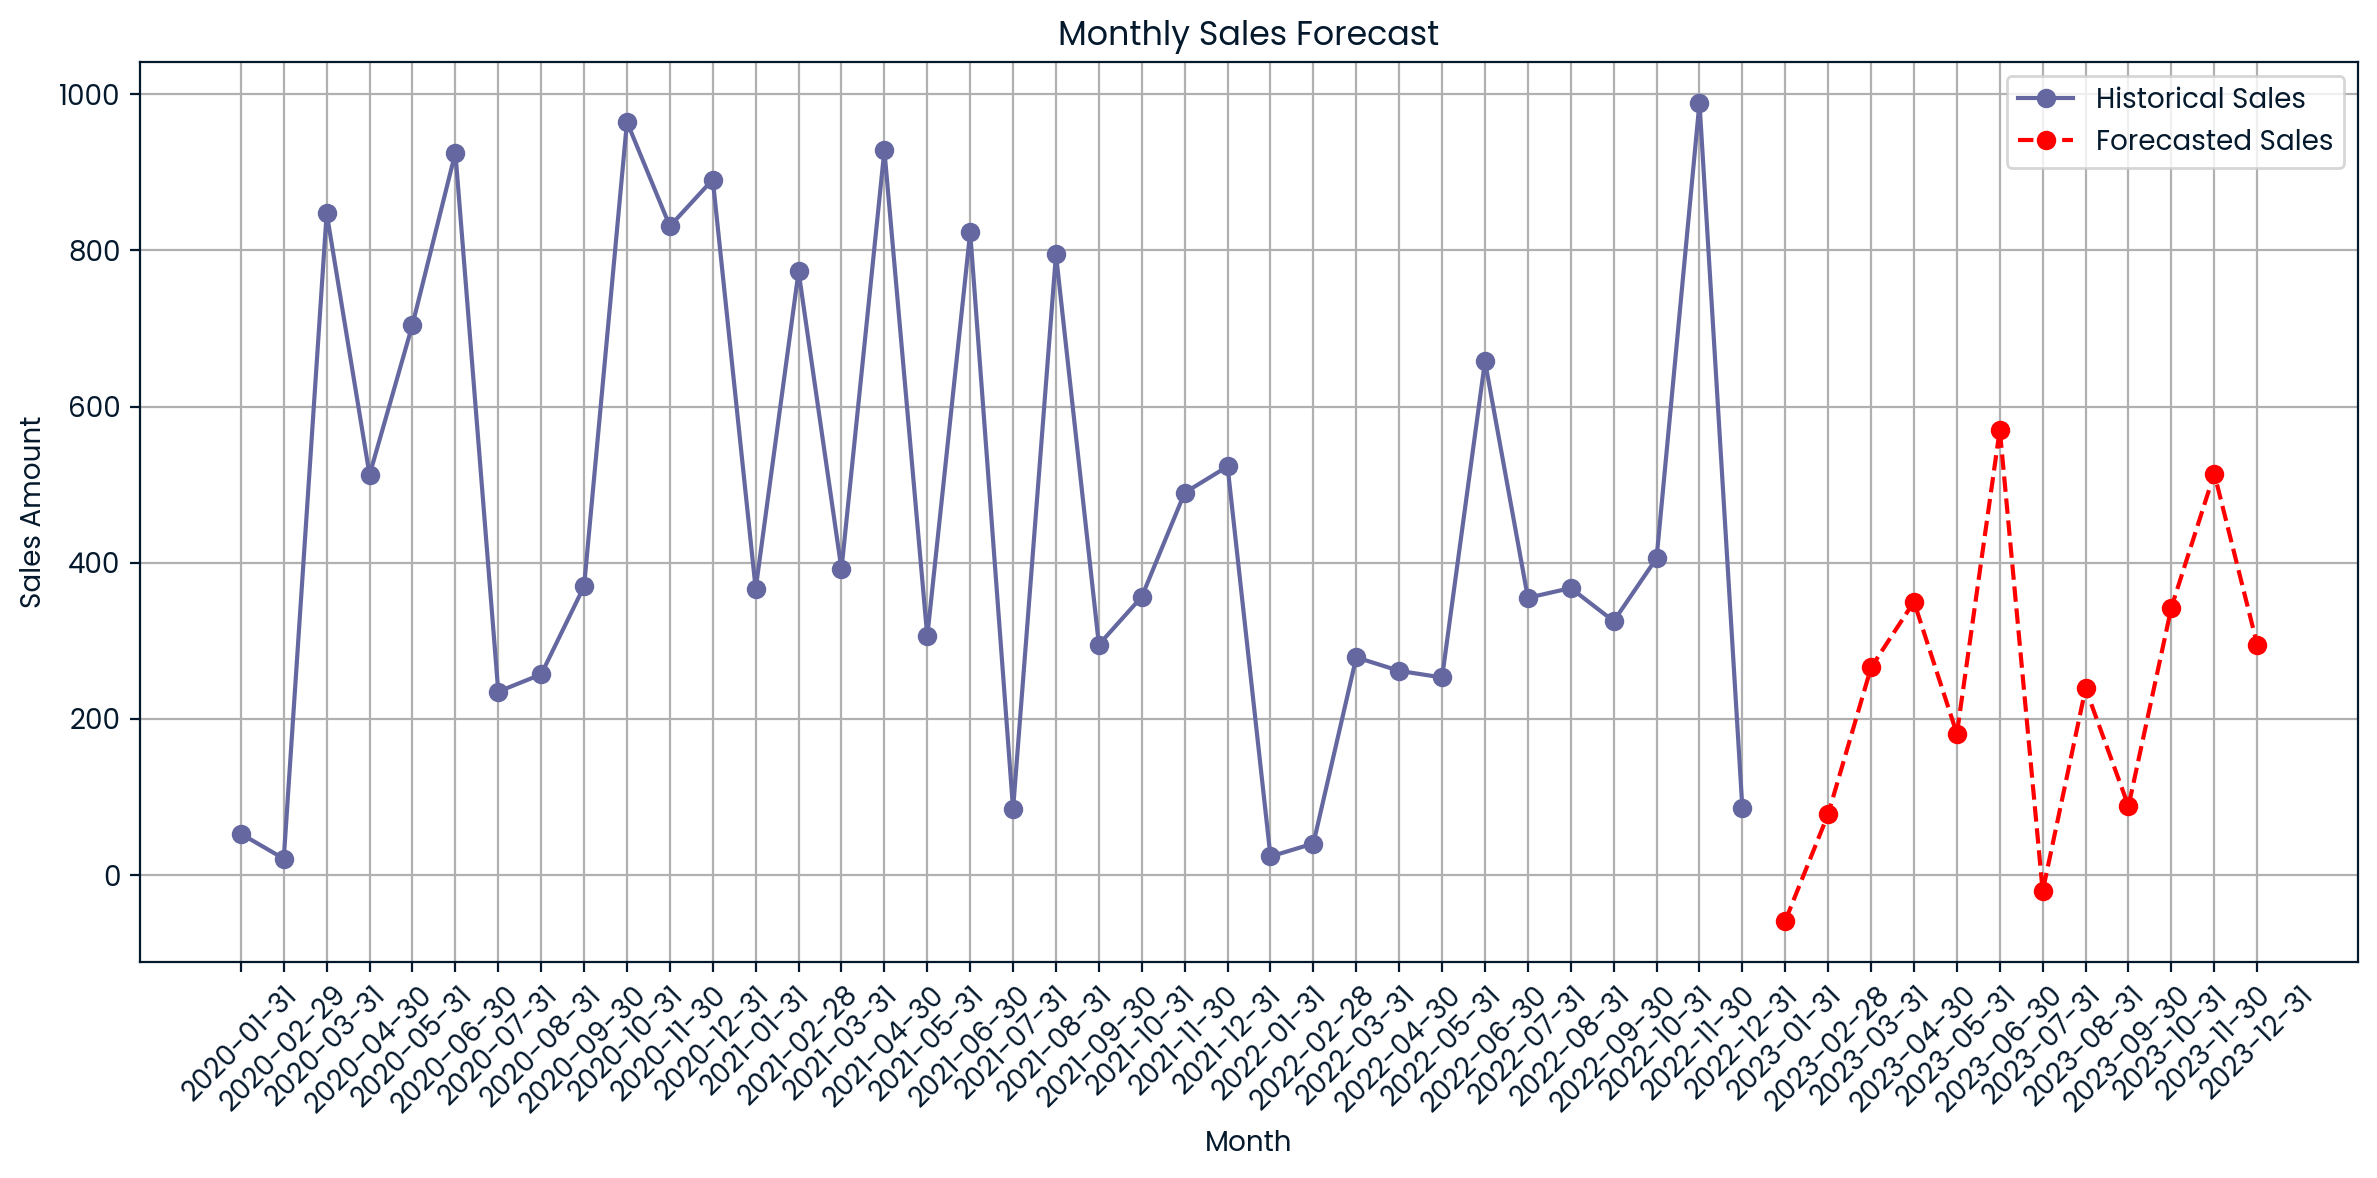

,year_month,sale_amt
0,2023-01-31,-58.552751
1,2023-02-28,78.159470
2,2023-03-31,265.857051
3,2023-04-30,349.962586
4,2023-05-31,180.934356
5,2023-06-30,570.540043
6,2023-07-31,-20.600504
7,2023-08-31,238.998941
8,2023-09-30,88.151949
9,2023-10-31,342.656687


In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration purposes
data = {
    'year_month': pd.date_range(start='2020-01-01', periods=36, freq='M'),
    'sale_amt': np.random.rand(36) * 1000
}
monthly_sales = pd.DataFrame(data)

# Prepare the data for time series forecasting
monthly_sales.set_index('year_month', inplace=True)

# Check if there are at least 24 data points (2 full seasonal cycles for monthly data)
if len(monthly_sales) < 24:
    raise ValueError("Not enough data to compute initial seasonals. Need at least 24 data points.")

# Fit the model
model = ExponentialSmoothing(monthly_sales['sale_amt'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Forecast the next 12 months
forecast = fit.forecast(12)

# Create a new dataframe for the forecasted values
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_df = pd.DataFrame({'year_month': forecast_index, 'sale_amt': forecast.values})

# Plot the historical and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales['sale_amt'], marker='o', label='Historical Sales')
plt.plot(forecast_df['year_month'].astype(str), forecast_df['sale_amt'], marker='o', linestyle='--', color='red', label='Forecasted Sales')
plt.title('Monthly Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the forecasted values
forecast_df

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Prepare the data
forecast_df['year_month'] = forecast_df['year_month'].astype('datetime64[ns]')
forecast_df['month'] = forecast_df['year_month'].dt.month
forecast_df['year'] = forecast_df['year_month'].dt.year

# Define features and target
X = forecast_df[['year', 'month']]
y = forecast_df['sale_amt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(kernel='rbf')
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse

results

{'Linear Regression': 30472.090912335814,
 'Random Forest': 33993.293764157796,
 'Support Vector Machine': 14443.140359914387}

In [27]:
# Read the CSV file into a DataFrame
pos_sales_df = pd.read_csv('pos sales.csv')

# Display the first few rows of the DataFrame to verify the data
pos_sales_df.head()

,txn_id,store_num,business_date,item_desc,sale_amt
0,359344,6752,9/4/2024,16 OZ COFFEE,1.99
1,1291468,926,9/4/2024,16 OZ COFFEE,3.58
2,991090,885,9/4/2024,16 OZ COFFEE,1.79
3,1359224,6943,9/4/2024,16 OZ COFFEE,1.89
4,565176,6747,9/4/2024,16 OZ COFFEE,1.79


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Prepare the data
# Assuming 'sales' DataFrame has 'year_month' and 'sale_amt' columns
# Convert 'year_month' to datetime if it's not already
if sales['year_month'].dtype == 'period[M]':
    sales['year_month'] = sales['year_month'].dt.to_timestamp()

sales['year_month'] = pd.to_datetime(sales['year_month'])

sales['year'] = sales['year_month'].dt.year
sales['month'] = sales['year_month'].dt.month

# Create features and target variable
X = sales[['year', 'month']]
y = sales['sale_amt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Predict future sales
# Assuming we want to predict for the next 6 months
future_dates = pd.date_range(start=sales['year_month'].max() + pd.DateOffset(months=1), periods=6, freq='MS')
future_df = pd.DataFrame({'year_month': future_dates})
future_df['year'] = future_df['year_month'].dt.year
future_df['month'] = future_df['year_month'].dt.month

# Predict future sales
future_sales_pred = model.predict(future_df[['year', 'month']])
future_df['predicted_sale_amt'] = future_sales_pred

# Display the future sales predictions
future_df

,year_month,year,month,predicted_sale_amt
0,2024-10-01,2024,10,1.993811
1,2024-11-01,2024,11,2.009280
2,2024-12-01,2024,12,2.024748
3,2025-01-01,2025,1,1.854594
4,2025-02-01,2025,2,1.870063
5,2025-03-01,2025,3,1.885532
